In [1]:
from pathlib import Path
from model_settings import ms
import pandas as pd
import sys
import os
import numpy as np
from model_settings import ms
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as mdates
from datetime import datetime
from datetime import timedelta
import QuantLib as ql
from itertools import product


pricing settings:
Actual/365 (Fixed) day counter
New York stock exchange calendar
compounding: continuous
frequency: annual



In [2]:
os.chdir(str(Path().resolve()))

In [3]:
store = pd.HDFStore(r'alphaVantage Vanillas.h5')
keys = store.keys()
store.close()
len(keys)

2997

In [4]:
contract_keys = [key for key in keys if key.find('hottest_contracts')!= -1]
len(contract_keys)

999

In [5]:
surface_keys = [key for key in keys if key.find('surface')!= -1]
len(surface_keys)

999

In [6]:
raw_data_keys = [key for key in keys if key.find('raw_data')!=-1]
len(raw_data_keys)

999

In [7]:
store.close()

# Routine Start

In [8]:
surface_key = surface_keys[2]
surface_key

'/date_2024_10_07/surface'

## loop start

In [9]:
second_backslash_pos = surface_key.find('/', 1)
date_key_component = surface_key[:second_backslash_pos+1]
date_key_component

'/date_2024_10_07/'

In [10]:
accomp = [key for key in contract_keys if f'{date_key_component}hottest_contracts' in contract_keys][0]
accomp

'/date_2024_10_09/hottest_contracts'

In [11]:
raw_data_key = [key for key in raw_data_keys if f'{date_key_component}raw_data' in raw_data_keys][0]
raw_data_key

'/date_2024_10_09/raw_data'

In [12]:
date_string = date_key_component[date_key_component.find('_',0)+1:date_key_component.find('_',0)+11]
date_string

'2024_10_07'

In [13]:
calculation_datetime = datetime.strptime(date_string,'%Y_%m_%d')
calculation_datetime

datetime.datetime(2024, 10, 7, 0, 0)

In [14]:
"""
HDF5 collection
"""
while True:
    try:
        store.open()
        raw_data = pd.DataFrame(store[raw_data_key])
        contracts = pd.DataFrame(store[accomp])
        vol_matrix = pd.DataFrame(store[surface_key])
        break
    except OSError:
        print(OSError)
        print('retrying in')
        for i in range (0,5):
            print(5-i)
    finally:
        store.close()

In [15]:
pd.to_numeric(raw_data['last'])
raw_data['date'] = pd.to_datetime(raw_data['date'])
raw_data['expiration'] = pd.to_datetime(raw_data['expiration'])
raw_data['implied_volatility'] = pd.to_numeric(raw_data['implied_volatility'])
raw_data['strike'] = pd.to_numeric(raw_data['strike'])
raw_data['last'] = pd.to_numeric(raw_data['last'])
raw_data.dtypes

contractID                    object
symbol                        object
expiration            datetime64[ns]
strike                       float64
type                          object
last                         float64
mark                          object
bid                           object
bid_size                      object
ask                           object
ask_size                      object
volume                        object
open_interest                 object
date                  datetime64[ns]
implied_volatility           float64
delta                         object
gamma                         object
theta                         object
vega                          object
rho                           object
dtype: object

In [16]:
contract_maturities = np.array((raw_data['expiration'] - raw_data['date']) / timedelta(days=1)).astype(int)
raw_data['days_to_maturity'] = contract_maturities

In [17]:
vol_matrix

,32,39,53,74,85,102,144,165,192
450.0,0.42836,0.40321,0.36952,0.34498,0.33095,0.32043,0.29894,0.29208,0.28415
485.0,0.34391,0.32821,0.30443,0.28934,0.27973,0.27303,0.25961,0.25565,0.25123
490.0,0.33278,0.31830,0.29620,0.28187,0.27287,0.26662,0.25443,0.25077,0.24681
500.0,0.31098,0.29848,0.27897,0.26723,0.25916,0.25413,0.24376,0.24086,0.23781
510.0,0.29071,0.27958,0.26266,0.25306,0.24605,0.24163,0.23324,0.23126,0.22913
520.0,0.27044,0.26159,0.24696,0.23964,0.23339,0.22989,0.22288,0.22166,0.22044
525.0,0.26129,0.25275,0.23919,0.23294,0.22730,0.22379,0.21785,0.21693,0.21617
530.0,0.25214,0.24422,0.23172,0.22638,0.22120,0.21785,0.21266,0.21221,0.21175
545.0,0.22471,0.21891,0.20931,0.20641,0.20245,0.20032,0.19772,0.19803,0.19879
550.0,0.21586,0.21038,0.20169,0.19971,0.19605,0.19452,0.19269,0.19330,0.19468


In [18]:
contracts.iloc[:5,:]

,days_to_maturity,strike_price,volume,contractID,symbol,expiration,type,last,mark,bid,...,open_interest,date,implied_volatility,delta,gamma,theta,vega,rho,spot_price,moneyness
0,37,590.0,67397.0,SPY241115C00590000,SPY,2024-11-15,call,6.12,6.11,6.08,...,12092.0,2024-10-09,0.13995,0.35852,0.01453,-0.57086,0.68647,0.20355,577.14,-0.021797
1,72,605.0,64064.0,SPY241220C00605000,SPY,2024-12-20,call,4.87,4.85,4.82,...,6212.0,2024-10-09,0.12501,0.25794,0.01008,-0.33194,0.82803,0.28409,577.14,-0.046050
2,72,560.0,17404.0,SPY241220P00560000,SPY,2024-12-20,put,9.45,9.53,9.51,...,26576.0,2024-10-09,0.18599,-0.30097,0.00730,-0.33227,0.89254,-0.36144,577.14,-0.029698
3,100,620.0,16420.0,SPY250117C00620000,SPY,2025-01-17,call,3.20,3.12,3.10,...,6897.0,2024-10-09,0.11465,0.17279,0.00738,-0.20827,0.77243,0.26465,577.14,-0.069129
4,37,545.0,11945.0,SPY241115P00545000,SPY,2024-11-15,put,3.97,3.98,3.96,...,37018.0,2024-10-09,0.21907,-0.17707,0.00645,-0.46435,0.47721,-0.10762,577.14,-0.055688


In [19]:
store.close()

In [20]:
contracts['spot_price'].unique()

array([577.14])

In [21]:
spot = float(contracts['spot_price'].unique()[0])
spot

577.14

In [22]:
T = vol_matrix.columns.tolist()
K = vol_matrix.index.tolist()
print(f"\nmaturitites:\n     {T}\nstrikes:\n     {K}\n")


maturitites:
     [32, 39, 53, 74, 85, 102, 144, 165, 192]
strikes:
     [450.0, 485.0, 490.0, 500.0, 510.0, 520.0, 525.0, 530.0, 545.0, 550.0, 560.0, 570.0, 580.0, 590.0, 595.0, 600.0, 625.0]



In [23]:
calculation_date = ql.Date(
    calculation_datetime.day,
    calculation_datetime.month,
    calculation_datetime.year)
print(calculation_date)

October 7th, 2024


In [24]:
r = 0.04
g = 0.018
s = spot
s

577.14

In [25]:
ql.Settings.instance().evaluationDate = calculation_date
flat_ts, dividend_ts = ms.ql_ts_rg(r, g, calculation_date)
S_handle = ql.QuoteHandle(ql.SimpleQuote(s))

heston_helpers = []
v0 = 0.01; kappa = 0.2; theta = 0.02; rho = -0.75; eta = 0.5;
process = ql.HestonProcess(
    flat_ts,
    dividend_ts,
    S_handle,
    v0,                # Initial volatility
    kappa,             # Mean reversion speed
    theta,             # Long-run variance (volatility squared)
    eta,               # Volatility of the volatility
    rho                # Correlation between asset and volatility
)
model = ql.HestonModel(process)
engine = ql.AnalyticHestonEngine(model)

for t in T:
    for k in K:
        p = ql.Period(int(t),ql.Days)
        volatility = vol_matrix.loc[k,t]
        helper = ql.HestonModelHelper(
            p, ms.calendar, float(s), k, 
            ql.QuoteHandle(ql.SimpleQuote(volatility)), 
            flat_ts, 
            dividend_ts
            )
        helper.setPricingEngine(engine)
        heston_helpers.append(helper)

lm = ql.LevenbergMarquardt(1e-8, 1e-8, 1e-8)


model.calibrate(heston_helpers, lm,
                  ql.EndCriteria(1000, 50, 1.0e-8,1.0e-8, 1.0e-8))

theta, kappa, eta, rho, v0 = model.params()
heston_parameters = pd.Series(
    [theta, kappa, eta, rho, v0],
    index = ['theta', 'kappa', 'eta', 'rho', 'v0'],
    dtype = float
)
print(heston_parameters)

theta    0.062142
kappa    2.592092
eta      1.912747
rho     -0.728593
v0       0.041699
dtype: float64


# Plotting

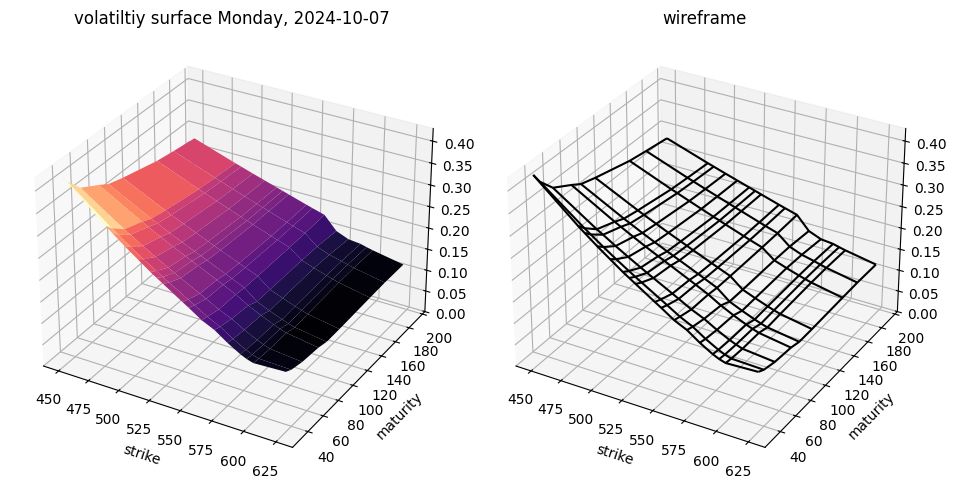

<Figure size 640x480 with 0 Axes>

In [26]:
printdate = calculation_datetime.strftime('%A, %Y-%m-%d')
KK,TT = np.meshgrid(K,T)
VV = np.array(
        [[vol_matrix.loc[k,t] for k in K] for t in T]
        )
fig = plt.figure(figsize=plt.figaspect(0.5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(KK, TT, VV, rstride=1, cstride=1, cmap=cm.magma, linewidth=0.1)


ax1.set_zlim(0, float(max(vol_matrix.values.flatten())))
ax1.set_title(f"volatiltiy surface {printdate}")
ax1.set_xlabel('strike')
ax1.set_ylabel('maturity')

# Second subplot for wireframe plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_wireframe(KK, TT, VV, rstride=1, cstride=1,color='black')
ax2.set_zlim(0, float(max(vol_matrix.values.flatten())))
ax2.set_title('wireframe')
ax2.set_xlabel('strike')
ax2.set_ylabel('maturity')
plt.tight_layout()
plt.show()
plt.clf()

# Testing

In [27]:
contracts.iloc[:5,:]

,days_to_maturity,strike_price,volume,contractID,symbol,expiration,type,last,mark,bid,...,open_interest,date,implied_volatility,delta,gamma,theta,vega,rho,spot_price,moneyness
0,37,590.0,67397.0,SPY241115C00590000,SPY,2024-11-15,call,6.12,6.11,6.08,...,12092.0,2024-10-09,0.13995,0.35852,0.01453,-0.57086,0.68647,0.20355,577.14,-0.021797
1,72,605.0,64064.0,SPY241220C00605000,SPY,2024-12-20,call,4.87,4.85,4.82,...,6212.0,2024-10-09,0.12501,0.25794,0.01008,-0.33194,0.82803,0.28409,577.14,-0.046050
2,72,560.0,17404.0,SPY241220P00560000,SPY,2024-12-20,put,9.45,9.53,9.51,...,26576.0,2024-10-09,0.18599,-0.30097,0.00730,-0.33227,0.89254,-0.36144,577.14,-0.029698
3,100,620.0,16420.0,SPY250117C00620000,SPY,2025-01-17,call,3.20,3.12,3.10,...,6897.0,2024-10-09,0.11465,0.17279,0.00738,-0.20827,0.77243,0.26465,577.14,-0.069129
4,37,545.0,11945.0,SPY241115P00545000,SPY,2024-11-15,put,3.97,3.98,3.96,...,37018.0,2024-10-09,0.21907,-0.17707,0.00645,-0.46435,0.47721,-0.10762,577.14,-0.055688


In [28]:
calibration_test_data = raw_data.copy()[['strike','type','last','implied_volatility','days_to_maturity']]
calibration_test_data.columns = ['strike_price','w','market_price','volatility','days_to_maturity']
calibration_test_data['spot_price'] = s
calibration_test_data['risk_free_rate'] = r
calibration_test_data['dividend_rate'] = g
calibration_test_data = calibration_test_data[calibration_test_data['days_to_maturity'].isin(contracts['days_to_maturity'])]
calibration_test_data = calibration_test_data[calibration_test_data['days_to_maturity'].isin(contracts['days_to_maturity'])]
calibration_test_data.dtypes

strike_price        float64
w                    object
market_price        float64
volatility          float64
days_to_maturity      int64
spot_price          float64
risk_free_rate      float64
dividend_rate       float64
dtype: object

In [29]:
calibration_test_data

,strike_price,w,market_price,volatility,days_to_maturity,spot_price,risk_free_rate,dividend_rate
3584,325.0,call,0.00,0.22619,30,577.14,0.04,0.018
3585,325.0,put,0.09,0.74085,30,577.14,0.04,0.018
3586,330.0,call,0.00,0.74603,30,577.14,0.04,0.018
3587,330.0,put,0.10,0.73049,30,577.14,0.04,0.018
3588,335.0,call,0.00,0.73963,30,577.14,0.04,0.018
...,...,...,...,...,...,...,...,...
6479,810.0,put,0.00,0.47622,163,577.14,0.04,0.018
6480,815.0,call,0.03,0.16236,163,577.14,0.04,0.018
6481,815.0,put,0.00,0.48278,163,577.14,0.04,0.018
6482,820.0,call,0.03,0.16510,163,577.14,0.04,0.018


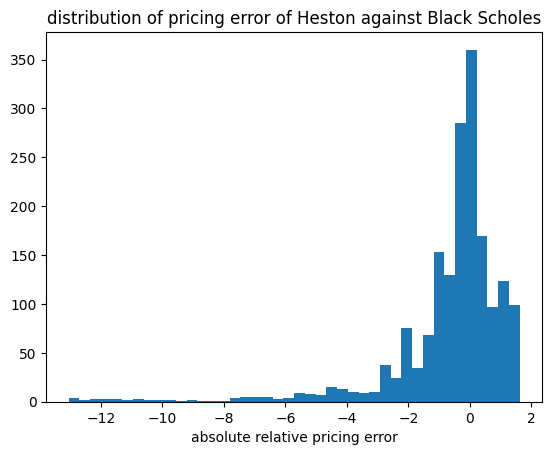

<Figure size 640x480 with 0 Axes>

In [30]:
calibration_test_data[heston_parameters.index.tolist()] = np.tile(heston_parameters,(calibration_test_data.shape[0],1))
calibration_test_data.loc[:,'moneyness'] = ms.vmoneyness(calibration_test_data['spot_price'].values,calibration_test_data['strike_price'].values,calibration_test_data['w'].values)
calibration_test_data['calculation_date'] = calculation_datetime
calibration_test_data['black_scholes'] = ms.vector_black_scholes(calibration_test_data)
calibration_test_data['heston_price'] = ms.vector_heston_price(calibration_test_data)
calibration_test_data.loc[:,'absolute_error'] = calibration_test_data['heston_price'].values - calibration_test_data['black_scholes'].values
plt.figure()
plt.hist(calibration_test_data['absolute_error'],bins=int(calibration_test_data.shape[0]**(1/2)))
plt.xlabel('absolute relative pricing error')
plt.title('distribution of pricing error of Heston against Black Scholes')
plt.show()
plt.clf()

In [31]:
large_errors = calibration_test_data.copy()[calibration_test_data['absolute_error']>=1]
print(large_errors.describe())

       strike_price  market_price  volatility  days_to_maturity    spot_price  \
count    193.000000    193.000000  193.000000        193.000000  1.930000e+02   
mean     527.406736      4.730207    0.229823         71.093264  5.771400e+02   
min      425.000000      0.000000    0.177450         30.000000  5.771400e+02   
25%      515.000000      3.050000    0.205650         51.000000  5.771400e+02   
50%      534.000000      4.580000    0.224400         51.000000  5.771400e+02   
75%      548.000000      6.060000    0.249250         72.000000  5.771400e+02   
max      566.000000     12.290000    0.320740        163.000000  5.771400e+02   
std       28.559178      2.288120    0.030538         40.122230  1.139825e-13   

       risk_free_rate  dividend_rate         theta         kappa  \
count    1.930000e+02   1.930000e+02  1.930000e+02  1.930000e+02   
mean     4.000000e-02   1.800000e-02  6.214197e-02  2.592092e+00   
min      4.000000e-02   1.800000e-02  6.214197e-02  2.592092e+00  

# Bulk Calibration Testing

In [32]:
from pathlib import Path
import os

In [33]:
historical_calibration = pd.read_csv(
    os.path.join(
        str(Path().resolve()),'AlphaVantageCalibrated.csv'
    )
).iloc[:,1:].copy()
print(historical_calibration.dtypes)

strike_price        float64
w                    object
market_price        float64
volatility          float64
days_to_maturity      int64
spot_price          float64
risk_free_rate      float64
dividend_rate       float64
theta               float64
kappa               float64
eta                 float64
rho                 float64
v0                  float64
moneyness           float64
calculation_date     object
black_scholes       float64
heston_price        float64
relative_error      float64
dtype: object


In [34]:
historical_calibration['calculation_date'] = pd.to_datetime(
    historical_calibration['calculation_date'],format='%Y-%m-%d')

In [35]:
print(
    historical_calibration.copy().describe()[[
        'strike_price', 'volatility', 'days_to_maturity',
        'spot_price', 'risk_free_rate', 'dividend_rate', 
        'moneyness', 'black_scholes', 'heston_price','market_price'
    ]].iloc[1:,:]
)
print(f"\ncount: {historical_calibration.shape[0]}")

      strike_price  volatility  days_to_maturity    spot_price  \
mean    505.101336    0.276123         72.779510  5.771400e+02   
min     120.000000    0.037670         30.000000  5.771400e+02   
25%     425.000000    0.160070         37.000000  5.771400e+02   
50%     534.000000    0.221005         51.000000  5.771400e+02   
75%     587.000000    0.339867        100.000000  5.771400e+02   
max     820.000000    1.044200        163.000000  5.771400e+02   
std     134.239433    0.165711         42.802302  4.547475e-13   

      risk_free_rate  dividend_rate     moneyness  black_scholes  \
mean    4.000000e-02   1.800000e-02  7.072541e-02      59.985316   
min     4.000000e-02   1.800000e-02 -7.920782e-01       0.010145   
25%     4.000000e-02   1.800000e-02 -1.249957e-01       1.801040   
50%     4.000000e-02   1.800000e-02  2.942857e-08      13.860089   
75%     4.000000e-02   1.800000e-02  1.428515e-01      78.987968   
max     4.000000e-02   1.800000e-02  3.809500e+00     458.08312

In [36]:
historical_heston_parameters = historical_calibration[[
    'calculation_date','theta','kappa','rho','eta','v0']].copy().set_index(
    'calculation_date').drop_duplicates().sort_index(ascending=False)
print(historical_heston_parameters.describe().iloc[1:,:])
print(f"\ncount: {historical_heston_parameters.shape[0]}")

             theta         kappa       rho        eta            v0
mean  9.499148e-02  1.025122e+00 -0.557984   0.765848  7.225828e-03
std   4.041083e-01  2.052755e+00  0.411298   0.884032  5.169173e-03
min   2.296023e-14  3.871847e-11 -1.000000   0.000006  7.517301e-13
25%   5.396223e-09  4.633956e-01 -0.737064   0.493967  5.480366e-04
50%   2.814812e-08  5.919053e-01 -0.732056   0.495945  9.738373e-03
75%   7.822874e-02  7.989389e-01 -0.614214   0.640486  9.806357e-03
max   6.995989e+00  4.527349e+01  0.999909  12.679597  4.621648e-02

count: 999


In [37]:
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format','{:.6f}'.format)
print(historical_heston_parameters)
pd.reset_option('display.max_rows')
pd.reset_option('display.float_format')

                    theta     kappa       rho       eta       v0
calculation_date                                                
2024-10-09       0.051864  7.126519 -0.745487  3.146618 0.046216
2024-10-08       0.213263  0.336359 -0.709446  1.356718 0.036446
2024-10-07       0.062142  2.592092 -0.728593  1.912747 0.041699
2024-10-04       0.059765  2.662874 -0.748102  1.835334 0.036605
2024-10-03       0.048013  2.963543 -0.726393  1.595685 0.038960
2024-10-02       0.057105 12.249352 -0.625874  5.891726 0.018039
2024-10-01       0.071193  2.576974 -0.711626  1.908637 0.026849
2024-09-30       0.054375 11.270029 -0.622273  4.786713 0.010151
2024-09-27       0.056978  9.524295 -0.585240  4.380494 0.011593
2024-09-26       0.053986  4.682874 -0.615024  2.248832 0.014444
2024-09-25       0.054009 10.174936 -0.478143  4.787390 0.000645
2024-09-24       0.055291  4.614371 -0.605548  2.465224 0.012428
2024-09-23       0.062339  3.041901 -0.574050  2.091594 0.015245
2024-09-20       0.149480

In [38]:
from plotnine import ggplot, aes, geom_point, labs, theme
def heat_scatter(
            df, X_name, Y_name, xlabel, ylabel, runtime, title):
        predictive_performance_plot = (
            ggplot(df, 
                   aes(x=X_name, y=Y_name)) + 
            geom_point(alpha=0.1) + 
            labs(x=xlabel, 
                 y=ylabel,
                 title=title) + 
            theme(legend_position="")
            )
        predictive_performance_plot.show()
        plt.clf()
        return predictive_performance_plot   

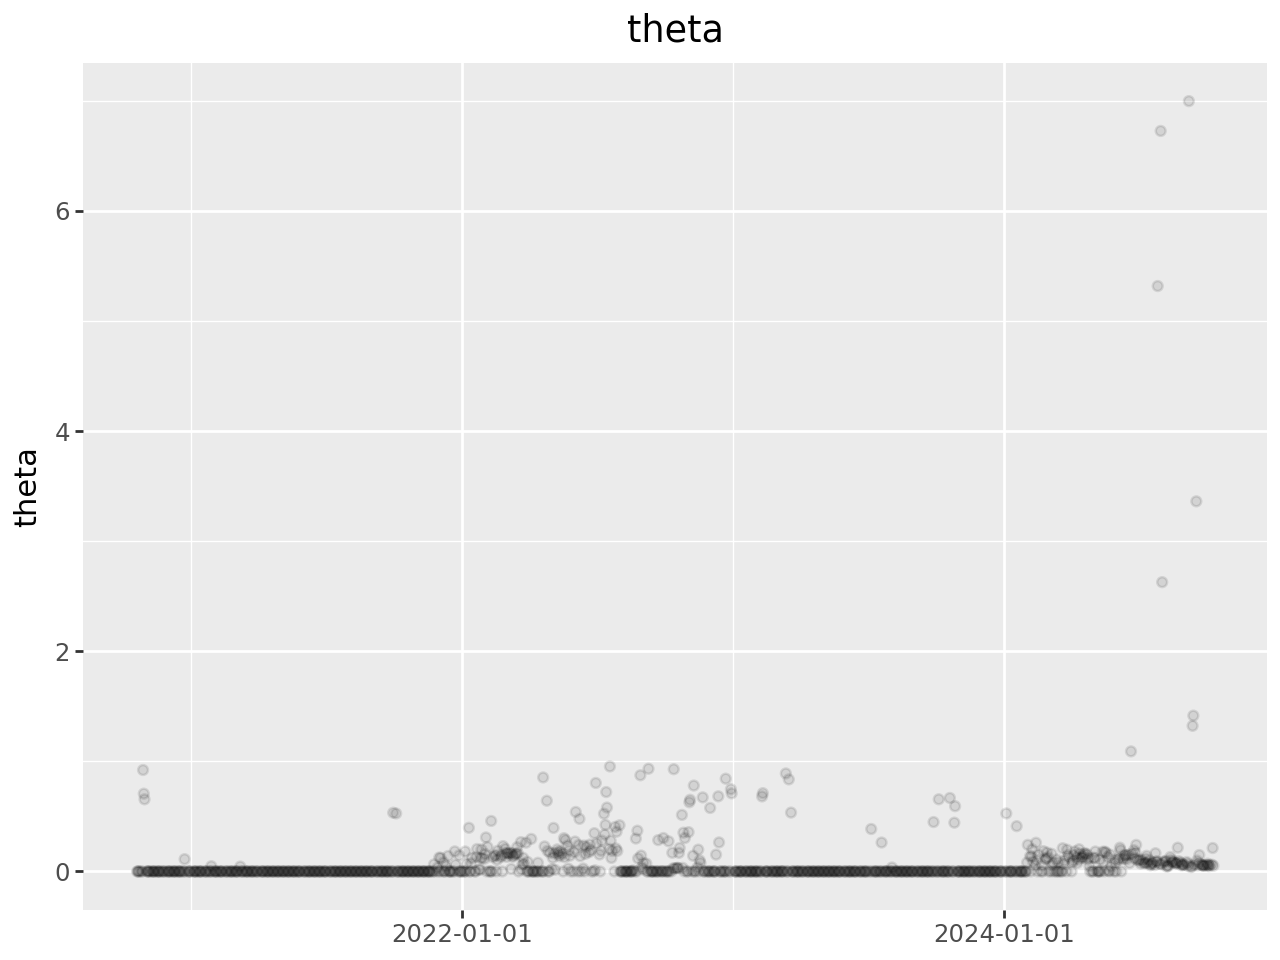

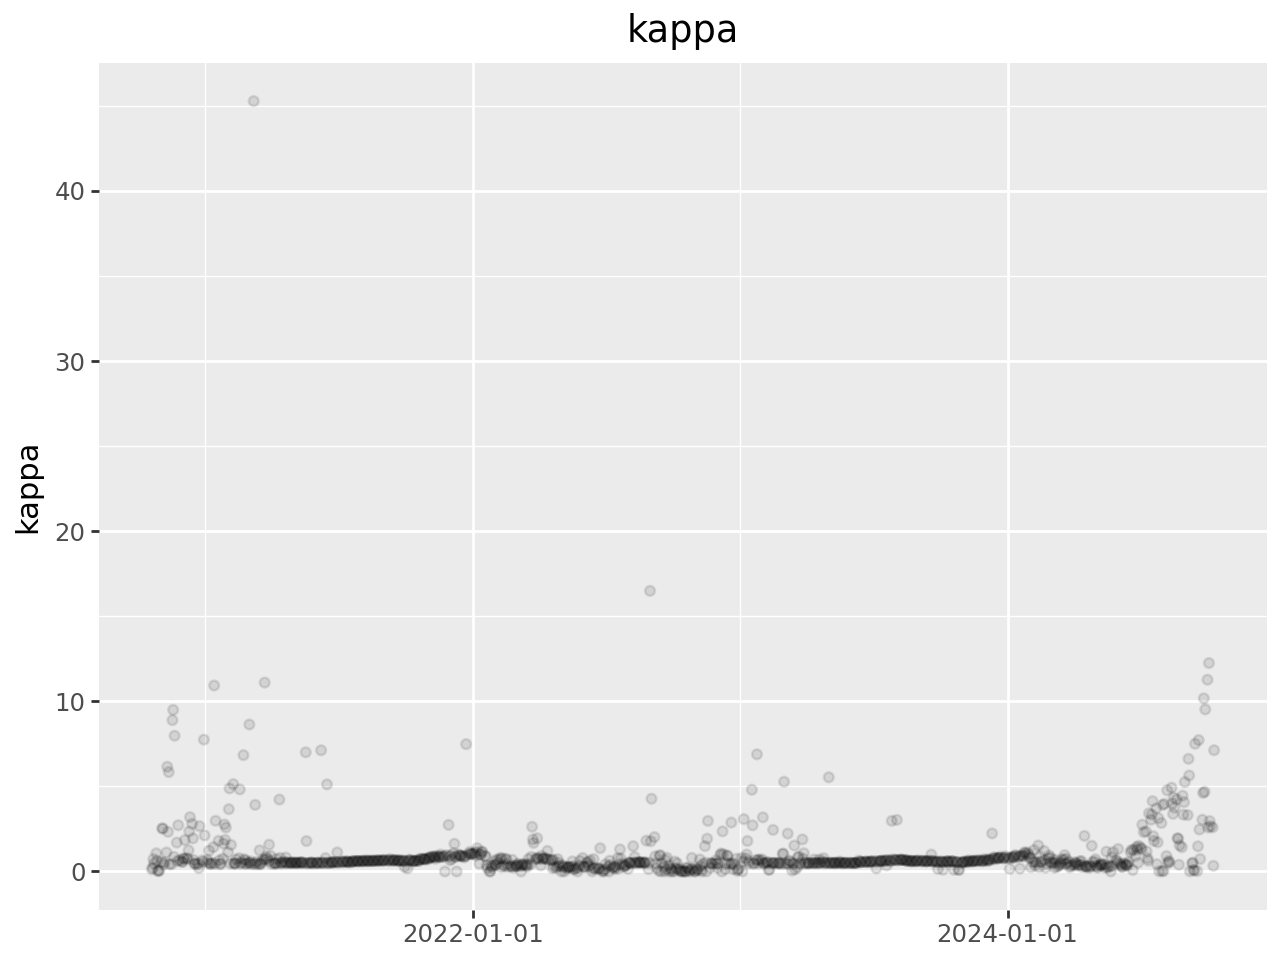

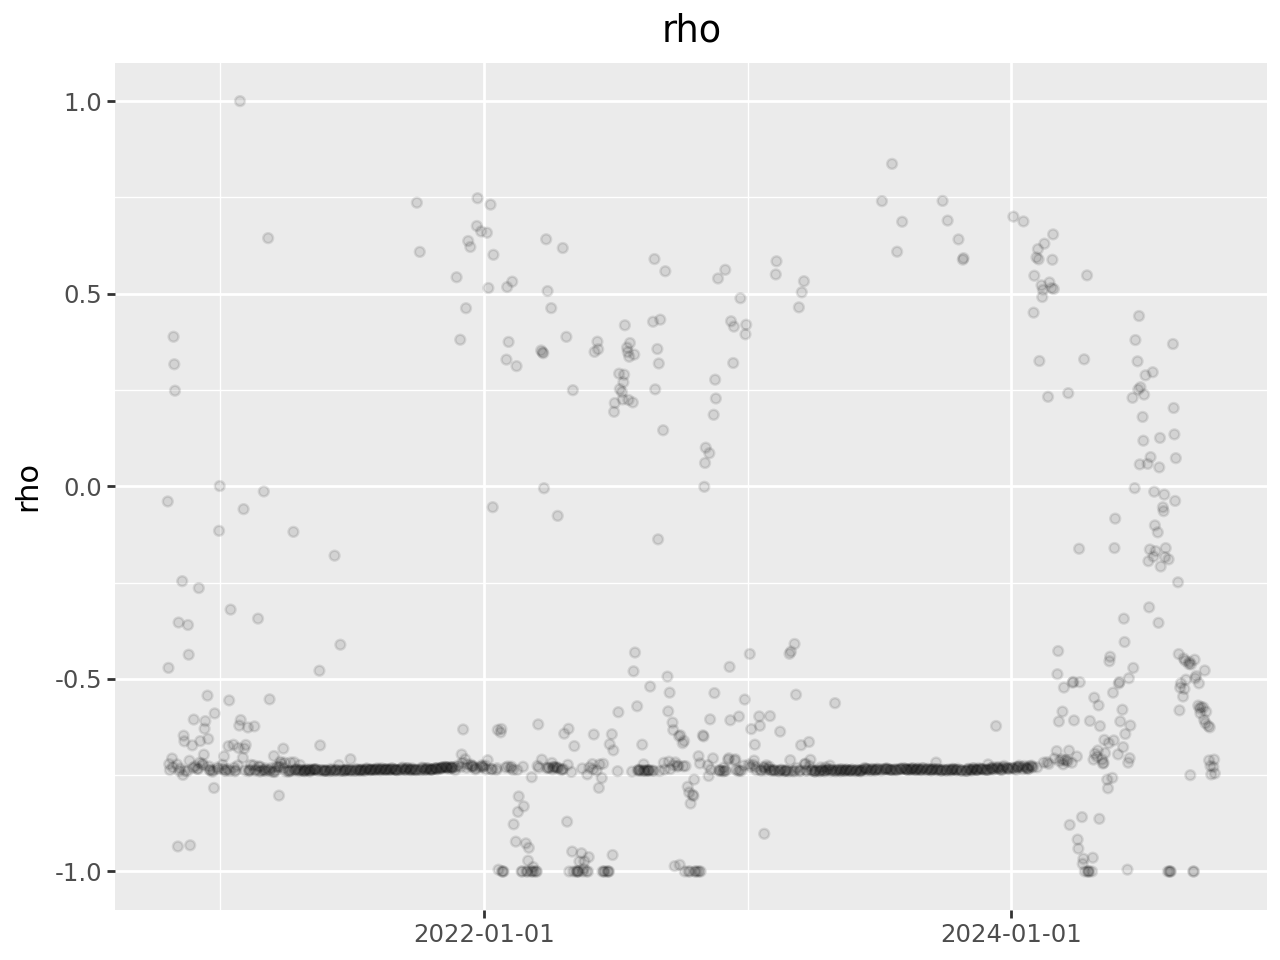

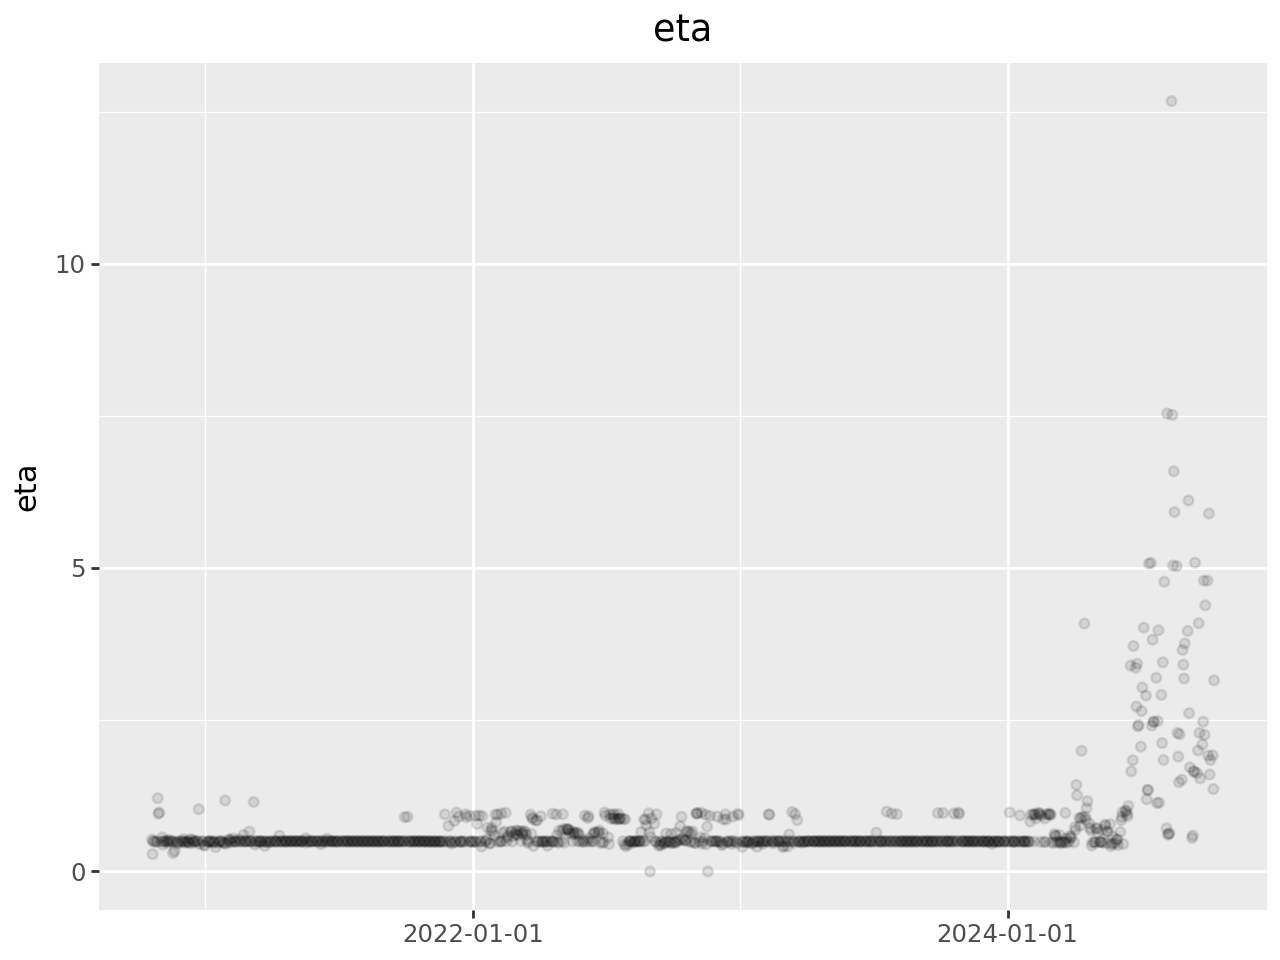

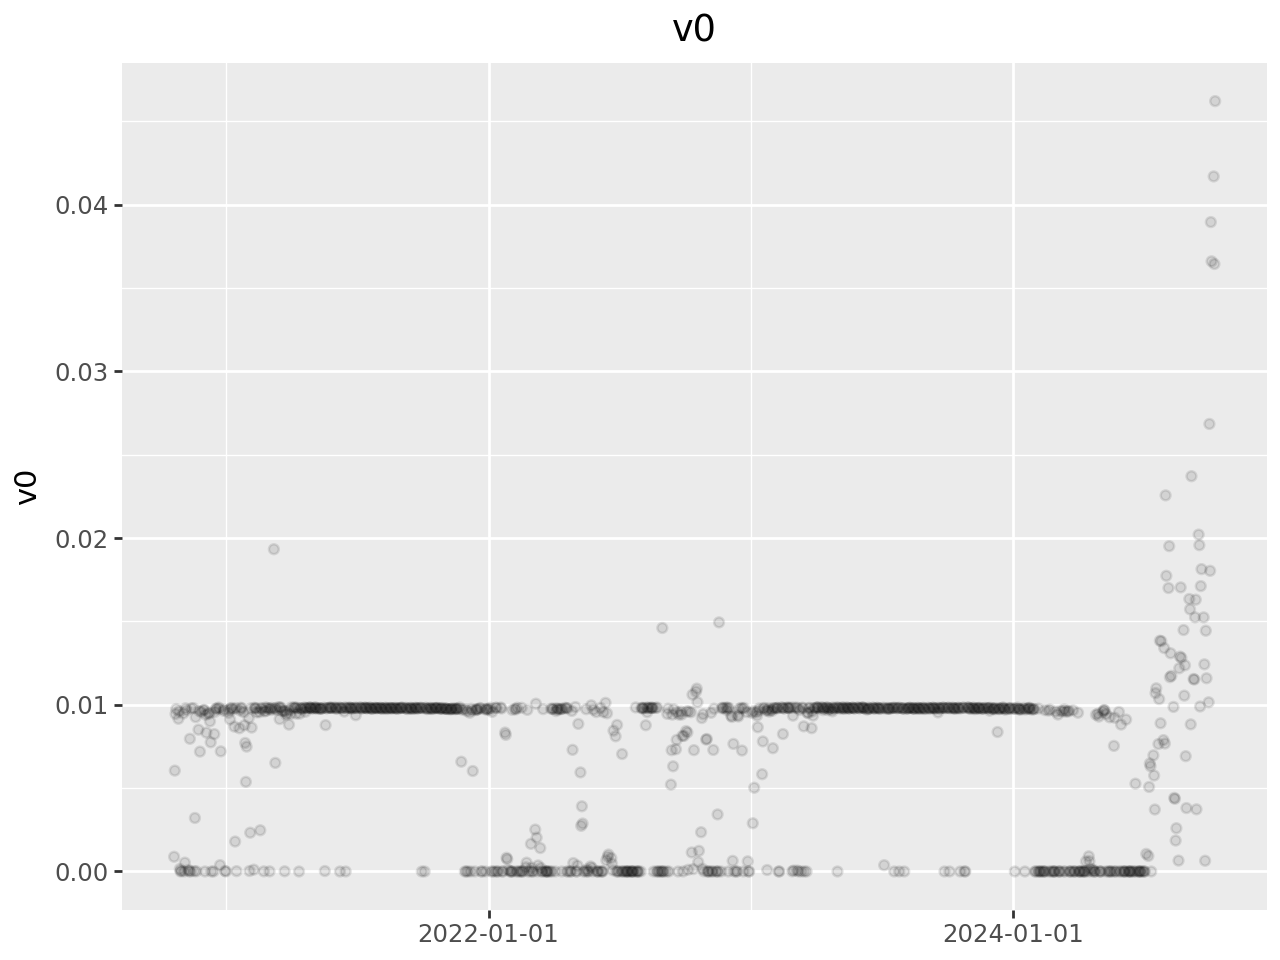

<Figure size 640x480 with 0 Axes>

In [39]:
heat_scatters = []
df = historical_heston_parameters.copy().reset_index()
for col in historical_heston_parameters:
    heat_scatters.append(heat_scatter(
            df, 'calculation_date', col, '', col, '', col)
    )

In [40]:
historical_heston_parameters[historical_heston_parameters['rho']<0]

,theta,kappa,rho,eta,v0
calculation_date,,,,,
2024-10-09,5.186425e-02,7.126519,-0.745487,3.146618,0.046216
2024-10-08,2.132628e-01,0.336359,-0.709446,1.356718,0.036446
2024-10-07,6.214197e-02,2.592092,-0.728593,1.912747,0.041699
2024-10-04,5.976465e-02,2.662874,-0.748102,1.835334,0.036605
2024-10-03,4.801255e-02,2.963543,-0.726393,1.595685,0.038960
...,...,...,...,...,...
2020-10-26,2.504135e-06,1.068680,-0.706629,0.488006,0.009161
2020-10-23,5.961603e-08,0.469288,-0.736712,0.496313,0.009748
2020-10-22,1.599529e-07,0.729666,-0.721206,0.491984,0.009454
